In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.datasets import load_iris
import plotly.express as px
import plotly.io as pio
pio.renderers.default='plotly_mimetype+notebook_connected'

In [297]:
wb = pd.read_csv("Data/WBnew.csv")
new_column_names = {'2015 [YR2015]': '2015', '2016 [YR2016]': '2016', '2017 [YR2017]': '2017', '2018 [YR2018]': '2018', '2019 [YR2019]': '2019'}
wb1519 = wb.rename(columns=new_column_names)
wb1519 = wb1519.drop(columns=['2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]'])
wb1519.head()

,Country Name,Country Code,Series Name,Series Code,2015,2016,2017,2018,2019
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585
1,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.44,0.45,0.42,0.4,0.38
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.27,62.646,62.406,62.443,62.941
3,Afghanistan,AFG,Net migration,SM.POP.NETM,-286314,-143049,-71491,-36753,9159
4,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,2.18729357416894,12.2764405423167,44.1873650754779,53.4795175761047,27.6573503133086


In [299]:
wbmelt = pd.melt(wb1519, id_vars=['Country Name','Series Name'], value_vars=['2015', '2016', '2017', '2018', '2019'], var_name='Year', value_name='Value')
wbmelt = wbmelt[wbmelt['Country Name'].isin(['Japan', 'France', 'Brazil', 'United States', 'Canada', 'China'])]
wbmelt = wbmelt.dropna()
wbpivot = wbmelt.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value').reset_index()
wbpivot = wbpivot.dropna(axis=1, how='all')
wbpivot.head()

Series Name,Country Name,Year,GDP per capita (current US$),"Hospital beds (per 1,000 people)",Income share held by highest 10%,"Life expectancy at birth, total (years)",Net migration,Real interest rate (%),Researchers in R&D (per million people),Secure Internet servers (per 1 million people)
0,Brazil,2015,8936.19661712113,2.35,40.9,75.106,-173611,33.8323439727973,..,161.164815967859
1,Brazil,2016,8836.28652735657,2.32,42.1,75.081,-92989,40.6983614262467,..,415.986539467638
2,Brazil,2017,10080.5092819305,2.3,42,75.383,-156296,41.7138078856955,..,1605.82544177505
3,Brazil,2018,9300.66164923219,2.26,42.5,75.633,-230334,33.1023342519639,..,2069.60200203718
4,Brazil,2019,9029.83326681073,2.24,42,75.809,-129216,31.9030727578921,..,2788.39613470957


/var/folders/9b/bb7yf3dj4qzbc23czfb1z3rh0000gn/T/ipykernel_27695/4273991784.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



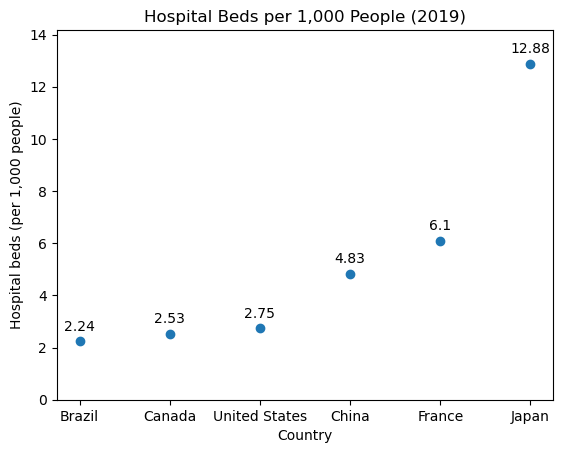

In [301]:
wb19 = wbpivot[wbpivot['Year'].isin(['2019'])]
wb19["Hospital beds (per 1,000 people)"] = pd.to_numeric(wb19["Hospital beds (per 1,000 people)"])
hospital_sort = wb19.sort_values("Hospital beds (per 1,000 people)")
x=hospital_sort["Country Name"]
y=hospital_sort["Hospital beds (per 1,000 people)"]

plt.plot(x, y, 'o')
plt.ylim(0, y.max()*1.1)
plt.ylabel("Hospital beds (per 1,000 people)") 
plt.xlabel("Country")
plt.title("Hospital Beds per 1,000 People (2019)")
for xi, yi in zip(x, y):
    plt.text(xi, yi+0.4, str(yi), ha='center')
plt.show()

This graph is short and simple, which is why I think it is so effective. You can see the clear gap between Japan and the other countries, but most interestingly, China has more hospital beds per capita and countries like Canada and the United States. This is a surprise since China not only has a population of over a billion, but in most per capita metrics, China seems to fall behind other superpower nations because of the overwhelming size of their population. The next thing I would investigate would be how the other European nations shape up against France, since the size of their healthcare industry may be related to other factors or it may just be the standard in Europe.

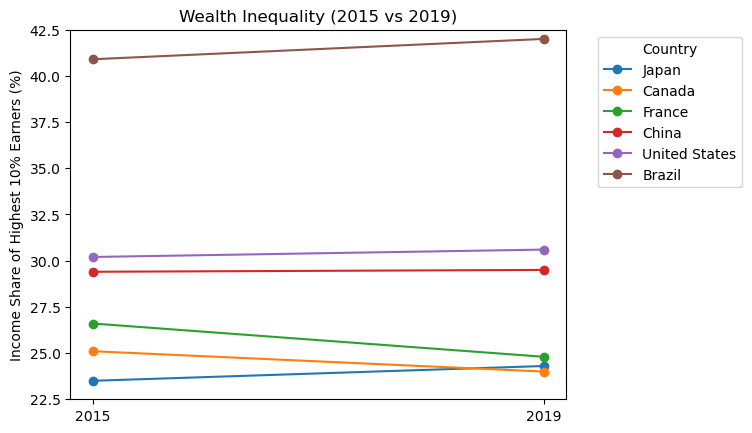

In [305]:
inc = wb1519[wb1519['Series Name'].isin(['Income share held by highest 10%'])]
inc = inc[inc['Country Name'].isin(['Japan', 'France', 'Brazil', 'United States', 'Canada', 'China'])]
inc['2015'] = pd.to_numeric(inc['2015'])
inc['2019'] = pd.to_numeric(inc['2019'])
inc = inc.sort_values('2015')

for c in inc.index:
    plt.plot([0,1], [inc.loc[c,'2015'], inc.loc[c,'2019']], label=inc.loc[c,'Country Name'], marker='o')
plt.xticks([0,1], ["2015","2019"])
plt.ylabel("Income Share of Highest 10% Earners (%)")
plt.title("Wealth Inequality (2015 vs 2019)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(22.5, 42.5)
plt.show()

The y-value on this graph shows the percentage of income that the top 10% of highest earners have over the rest of the population. Thus, if everyone had the same wage, we would expect this percentage to be 10%. Although the slope aspect of this graph does not really highlight any major changes with these 6 countries over a 5 year timeframe, the graph itself is a nice visualization of the differences in wealth disparity between different countries. Brazil is definitely the outlier out of these nations, with the top 10% earning almost twice as much (percentage wise) as the top 10% in Japan, Canada, and France. It is important to note this is not measuring the total wealth of the top 10%, but on the year-to-year income of the highest earners, in each country, compared to the other 90% of the population.

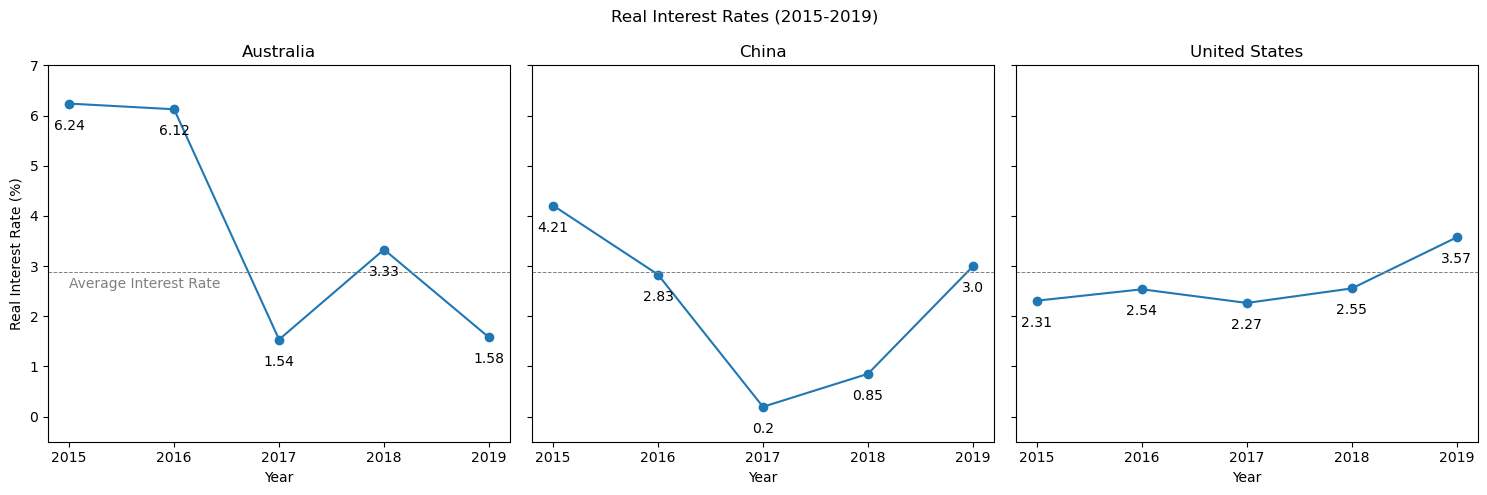

In [479]:
interest=wb1519[wb1519['Country Name'].isin(['Australia', 'United States', 'China'])]
interest=interest[interest['Series Name'].isin(['Real interest rate (%)'])]
years=['2015', '2016', '2017', '2018', '2019']
total=0
for y in years:
    interest[y]=pd.to_numeric(interest[y])
    total+=interest[y]
avg=total/5
totavg=avg.sum()/3
i=0
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for c in interest.index:
    axes[i].plot(years, interest.loc[c, years], marker='o')
    axes[i].set_title(interest.loc[c,'Country Name'])
    axes[i].set_xlabel("Year")
    axes[0].set_ylabel("Real Interest Rate (%)")
    for xi, yi in zip(years, interest.loc[c, years]):
        axes[i].text(xi, yi-0.3, str(round(yi, 2)), va='top', ha='center')
    i+=1
for ax in axes:
    ax.axhline(y=totavg, color='gray', linestyle='--', linewidth=0.7)
axes[0].text(x=years[0], y=totavg-0.1, s='Average Interest Rate', color='gray', va='top')
fig.suptitle('Real Interest Rates (2015-2019)')
plt.ylim(-0.5, 7)
plt.tight_layout()
plt.show()

Although this is not an index with a baseline, I included a horizontel line to indicate the average interest rate across all the years of the 3 selected countries. While these graphs do not have much meaning without context, I still believe this is a great way to visualize the given information. The shared Y-axis is perfect for something simple like interest rates, but having the text labels for each datapoint makes this visualization sufficient in every aspect.

Final Reflection:
I think the facetted graphs have the most possible use cases in data visualization, as it relays the same information as having multiple plots on the same graph, but it seperates the different groups which helps with readability. My favorite visaulization from this homework would be the sorted Cleveland dot plot, similaraly to a bar graph, it does a nice job at comparing a single measurement while keeping the layout simple. In my opinion, the slope graph has the most potential here as I feel like the data I chose was not the best use for the slope graph. Maybe if I extended to timeframe to 10 years, we would see more drastic changes that can tell us more about the underlying political and economic situations that occured in each nation.